# Wieloczynnikowa ANOVA

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dane=pd.read_csv("ogłoszenia.csv",sep=";")
dane

,Day,Section,Response
0,Monday,News,11
1,Monday,News,8
2,Monday,News,6
3,Monday,News,8
4,Tuesday,News,9
5,Tuesday,News,10
6,Tuesday,News,10
7,Tuesday,News,12
8,Wednesday,News,8
9,Wednesday,News,9


## Wykresy

<Axes: title={'center': 'Response'}, xlabel='Section'>

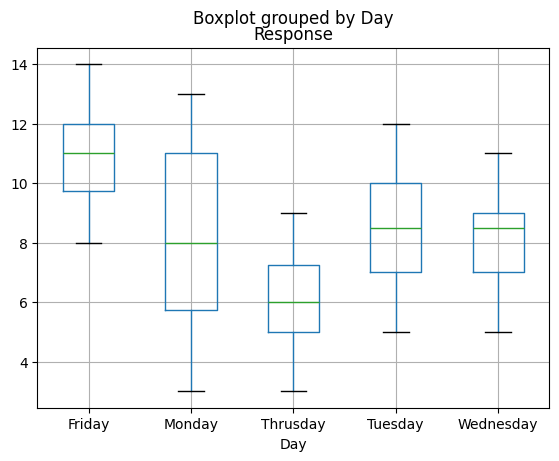

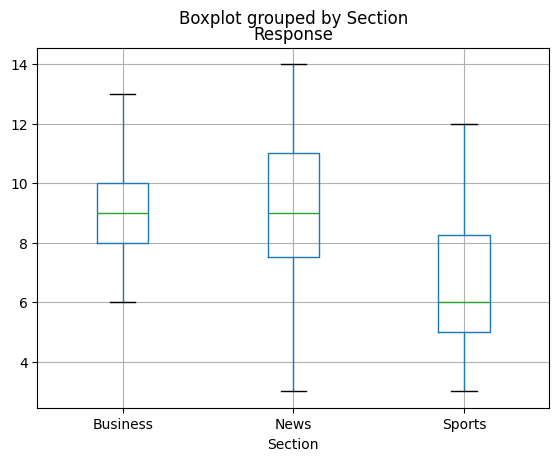

In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import numpy as np

dane=pd.read_csv("ogłoszenia.csv",sep=";")
#dane.rename(columns={dane.columns[2]: "weight"}, inplace=True)

dane.boxplot(column='Response', by='Day')
dane.boxplot(column='Response', by='Section')





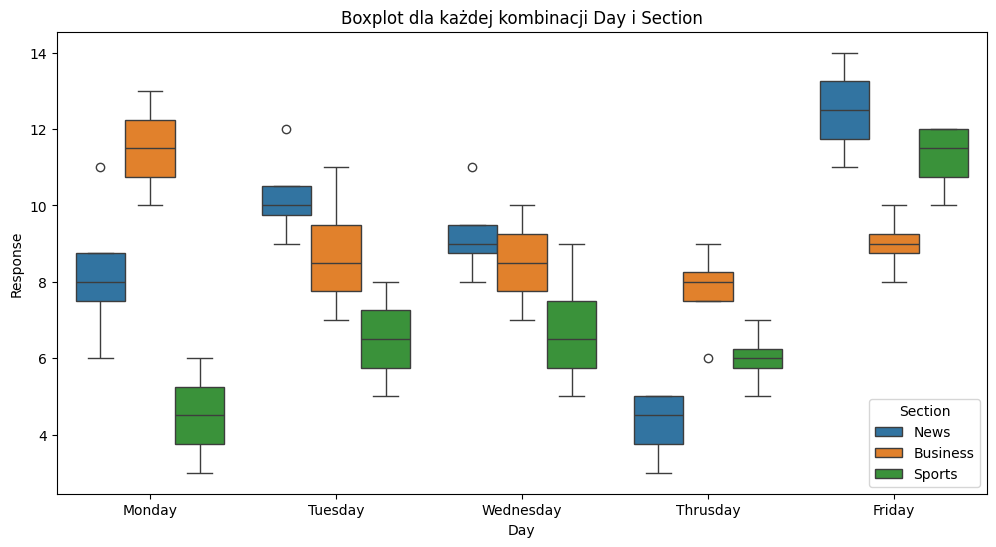

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

# Tworzenie boxplotu dla każdej kombinacji Day i Section
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day', y='Response', hue='Section', data=dane)
plt.title('Boxplot dla każdej kombinacji Day i Section')
plt.show()

          Day   Section  Response
0      Monday      News        11
1      Monday      News         8
2      Monday      News         6
3      Monday      News         8
4     Tuesday      News         9
5     Tuesday      News        10
6     Tuesday      News        10
7     Tuesday      News        12
8   Wednesday      News         8
9   Wednesday      News         9
10  Wednesday      News         9
11  Wednesday      News        11
12   Thrusday      News         4
13   Thrusday      News         5
14   Thrusday      News         3
15   Thrusday      News         5
16     Friday      News        13
17     Friday      News        12
18     Friday      News        11
19     Friday      News        14
20     Monday  Business        10
21     Monday  Business        12
22     Monday  Business        13
23     Monday  Business        11
24    Tuesday  Business         7
25    Tuesday  Business         8
26    Tuesday  Business        11
27    Tuesday  Business         9
28  Wednesday 

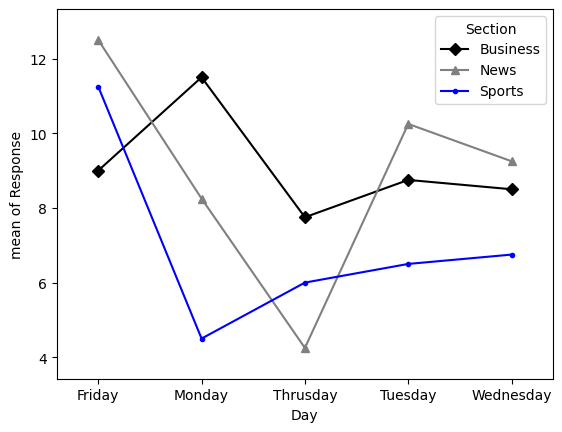

In [5]:
print(dane)

fig = interaction_plot(dane.Day, dane.Section, dane['Response'],
             colors=['black','gray','blue'], markers=['D','^','.'])

plt.show()



## Założenia

In [6]:
from scipy.stats import shapiro
#testy normalnosci dla kazdej grupy
dane.groupby(['Day', 'Section']).apply(lambda group: shapiro(group['Response'])[1])

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14064\308139842.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dane.groupby(['Day', 'Section']).apply(lambda group: shapiro(group['Response'])[1])


Day        Section 
Friday     Business    0.682962
           News        0.971877
           Sports      0.272453
Monday     Business    0.971877
           News        0.571911
           Sports      0.971877
Thrusday   Business    0.406387
           News        0.272453
           Sports      0.682962
Tuesday    Business    0.849971
           News        0.406387
           Sports      0.971877
Wednesday  Business    0.971877
           News        0.406387
           Sports      0.849971
dtype: float64

In [7]:
dane.groupby(['Section']).apply(lambda group: shapiro(group['Response'])[1])

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14064\2719901054.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dane.groupby(['Section']).apply(lambda group: shapiro(group['Response'])[1])


Section
Business    0.541293
News        0.601001
Sports      0.060132
dtype: float64

In [8]:
dane.groupby(['Day']).apply(lambda group: shapiro(group['Response'])[1])

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14064\3580372853.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dane.groupby(['Day']).apply(lambda group: shapiro(group['Response'])[1])


Day
Friday       0.915503
Monday       0.607099
Thrusday     0.854963
Tuesday      0.993397
Wednesday    0.836246
dtype: float64

In [9]:
from scipy.stats import bartlett

#test bartletta
grouped_data_day = [group['Response'].values for name, group in dane.groupby('Day')]
bartlett_test = bartlett(*grouped_data_day)



grouped_data_day = [group['Response'].values for name, group in dane.groupby('Section')]
bartlett_test = bartlett(*grouped_data_day)

grouped_data_day_section = [group['Response'].values for name, group in dane.groupby(['Day', 'Section'])]
bartlett_test_day_section = bartlett(*grouped_data_day_section)

print('Bartlett test for homogeneity of variances:', bartlett_test_day_section)

Bartlett test for homogeneity of variances: BartlettResult(statistic=5.112673055784, pvalue=0.9841819721497607)


## Test

In [10]:
#ANOVA wieloczynnikowa
model = ols('Response ~ C(Day) * C(Section)', data=dane).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                       sum_sq    df          F        PR(>F)
C(Day)             146.833333   4.0  20.909810  8.517535e-10
C(Section)          53.733333   2.0  15.303797  8.502752e-06
C(Day):C(Section)  135.766667   8.0   9.666930  1.124687e-07
Residual            79.000000  45.0        NaN           NaN


In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Przeprowadzenie testu post hoc Tukey HSD dla ANOVY dla day
tukey_results = pairwise_tukeyhsd(dane['Response'], dane['Day'], alpha=0.05)

# Przeprowadzenie testu post hoc Tukey HSD dla ANOVY dla section
tukey_results = pairwise_tukeyhsd(dane['Response'], dane['Section'], alpha=0.05)

# Przeprowadzenie testu post hoc Tukey HSD dla section i day
tukey_results_day = pairwise_tukeyhsd(dane['Response'], dane['Day'] + ' - ' + dane['Section'], alpha=0.05)


print(tukey_results_day)


               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------
   Friday - Business        Friday - News      3.5 0.0338   0.1408  6.8592   True
   Friday - Business      Friday - Sports     2.25 0.5264  -1.1092  5.6092  False
   Friday - Business    Monday - Business      2.5 0.3557  -0.8592  5.8592  False
   Friday - Business        Monday - News    -0.75    1.0  -4.1092  2.6092  False
   Friday - Business      Monday - Sports     -4.5 0.0015  -7.8592 -1.1408   True
   Friday - Business  Thrusday - Business    -1.25  0.989  -4.6092  2.1092  False
   Friday - Business      Thrusday - News    -4.75 0.0006  -8.1092 -1.3908   True
   Friday - Business    Thrusday - Sports     -3.0 0.1254  -6.3592  0.3592  False
   Friday - Business   Tuesday - Business    -0.25    1.0  -3.6092  3.1092  False
   Friday - Busi

# ANOVA z powtórzeniami

In [12]:
auta = pd.DataFrame({'Patient': np.repeat([1, 2, 3, 4, 5], 4), 
                          'Time': np.tile([1, 2, 3, 4], 5), 
                          'Score': [36, 38, 30, 29, 
                                      34, 38, 30, 29, 
                                      34, 28, 38, 32, 
                                      38, 34, 20, 44, 
                                      26, 28, 34, 50]}) 

auta_pivot = auta.pivot(index='Patient', columns='Time', values='Score')

## Wykres

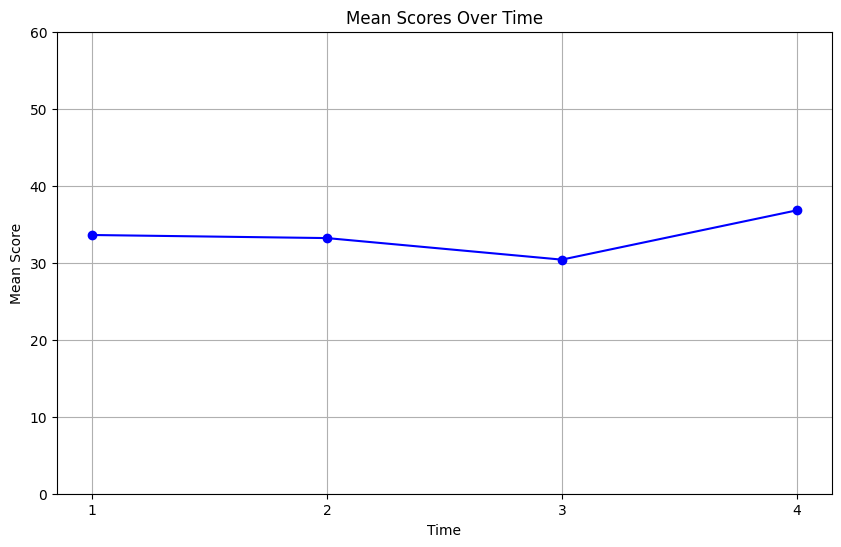

In [13]:
import matplotlib.pyplot as plt

#Wykres średnich
mean_scores = auta.groupby('Time')['Score'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_scores.index, mean_scores.values, marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('Mean Score')
plt.title('Mean Scores Over Time')
plt.ylim(0, 60)  
plt.xticks(mean_scores.index)
plt.grid(True)
plt.show()

## Założenia

In [14]:
from statsmodels.stats.correlation_tools import cov_nearest
from scipy.linalg import eigh
from pingouin import sphericity
from scipy import stats

#testy normalności dla każdej z grup
shapiro_oil1 = shapiro(auta_pivot[1])
shapiro_oil2 = shapiro(auta_pivot[2])
shapiro_oil3 = shapiro(auta_pivot[3])
shapiro_oil4 = shapiro(auta_pivot[4])

print('Shapiro-Wilk test for normality (1):', shapiro_oil1)
print('Shapiro-Wilk test for normality (2):', shapiro_oil2)
print('Shapiro-Wilk test for normality (3):', shapiro_oil3)
print('Shapiro-Wilk test for normality (4):', shapiro_oil4)



Shapiro-Wilk test for normality (1): ShapiroResult(statistic=0.859908422159255, pvalue=0.22791974965790102)
Shapiro-Wilk test for normality (2): ShapiroResult(statistic=0.8143201129096824, pvalue=0.10547458504198548)
Shapiro-Wilk test for normality (3): ShapiroResult(statistic=0.9327994605426272, pvalue=0.6155814142501543)
Shapiro-Wilk test for normality (4): ShapiroResult(statistic=0.8332791724921702, pvalue=0.14718439296571162)


In [15]:

# Test sferyczności Mauchly
mauchly_test_pingouin_auta = sphericity(auta_pivot)
print('Mauchly test for sphericity', mauchly_test_pingouin_auta)

Mauchly test for sphericity SpherResults(spher=True, W=0.28740984224030375, chi2=3.394192052583432, dof=5, pval=0.6589629981191093)


In [16]:

# Test homogeniczności wariancji Levenea
levene_test_auta = stats.levene(auta_pivot[1], auta_pivot[2], auta_pivot[3], auta_pivot[4])
print('Levene\'s test for homogeneity of variances:', levene_test_auta)

Levene's test for homogeneity of variances: LeveneResult(statistic=0.7321365716297078, pvalue=0.5478418985023898)


## Test

In [17]:
from statsmodels.stats.anova import AnovaRM 

# test ANOVA z powtarzanymi pomiarami
print(AnovaRM(data=auta, depvar='Score', 
              subject='Patient', within=['Time']).fit()) 



              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
Time  0.5679 3.0000 12.0000 0.6466



# ANCOVA

## Wykresy

In [18]:
dane=pd.read_csv("my_data.csv",sep=",")

<Axes: title={'center': 'score'}, xlabel='exercise'>

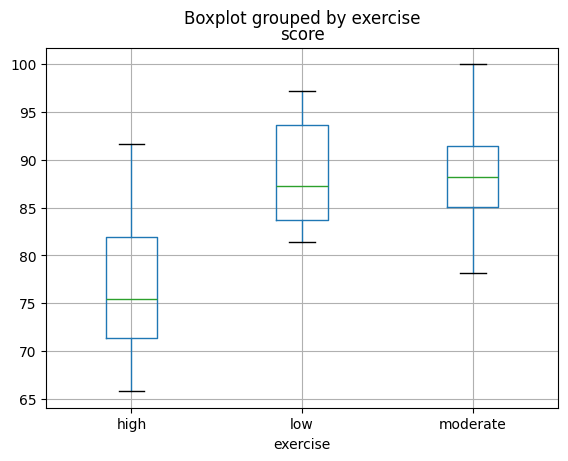

In [19]:
dane.boxplot(column='score',by='exercise')

<Axes: title={'center': 'age'}, xlabel='exercise'>

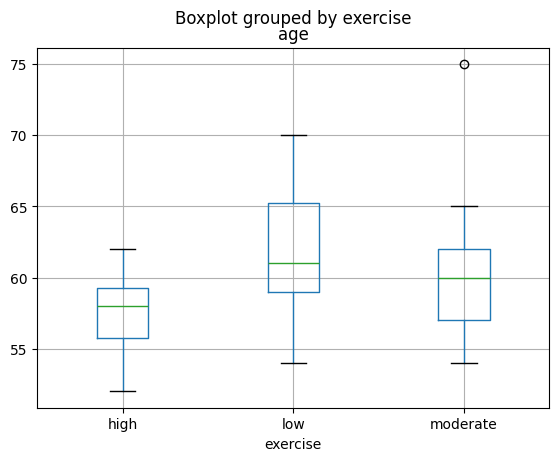

In [20]:
dane.boxplot(column='age',by='exercise')

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Założenia

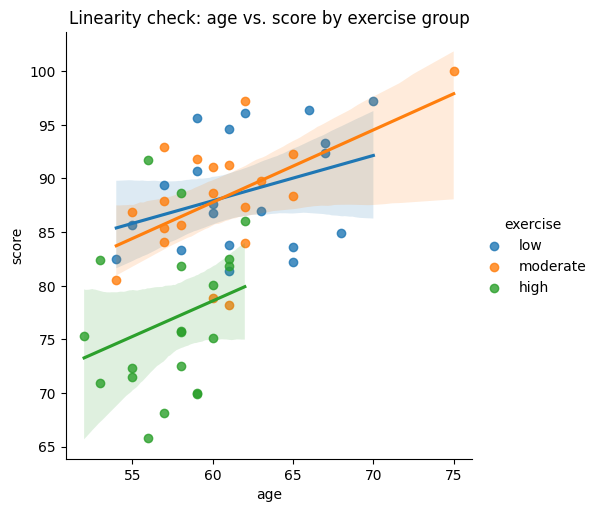

In [22]:
#Założenie o liniowości
sns.lmplot(x='age', y='score', hue='exercise', data=dane)
plt.title('Linearity check: age vs. score by exercise group')
plt.show()

In [23]:
#zalożenie o normalności w każdej grupie
shapiro_results_exercise = dane.groupby('exercise').apply(lambda group: shapiro(group['score'])[1])
print(shapiro_results_exercise)

exercise
high        0.445203
low         0.070271
moderate    0.900429
dtype: float64


C:\Users\kacpr\AppData\Local\Temp\ipykernel_14064\3560402403.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shapiro_results_exercise = dane.groupby('exercise').apply(lambda group: shapiro(group['score'])[1])


In [24]:
from scipy.stats import bartlett

#Test bartletta
bartlett_test_exercise = bartlett(dane['score'][dane['exercise'] == 'low'],
                                  dane['score'][dane['exercise'] == 'moderate'],
                                  dane['score'][dane['exercise'] == 'high'])

print('Bartlett test for homogeneity of variances:', bartlett_test_exercise)

Bartlett test for homogeneity of variances: BartlettResult(statistic=1.844048647362923, pvalue=0.39771312554430266)


In [25]:
#Sprawdzenie czy występuje homogeniczność regresji
model_interaction = smf.ols('score ~ age * exercise', data=dane).fit()
ancova_interaction_results = sm.stats.anova_lm(model_interaction, typ=2)
print(ancova_interaction_results)
ancova_interaction_results.to_excel('ancova_interaction_results.xlsx')

                   sum_sq    df          F    PR(>F)
exercise       980.912057   2.0  14.714661  0.000008
age            298.421227   1.0   8.953233  0.004169
age:exercise    13.699636   2.0   0.205508  0.814867
Residual      1799.880137  54.0        NaN       NaN


In [26]:
model = smf.ols('score ~ age + exercise', data=dane).fit()
residuals = model.resid

# Test normalności reszt 
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk test for normality:', shapiro_test)



Shapiro-Wilk test for normality: ShapiroResult(statistic=0.9851164863738079, pvalue=0.6760889323500447)


In [27]:
from statsmodels.stats.stattools import durbin_watson

# Test autokorelacji
dw_test = durbin_watson(model.resid)
print('Durbin-Watson test statistic:', dw_test)

Durbin-Watson test statistic: 1.6042420594042648


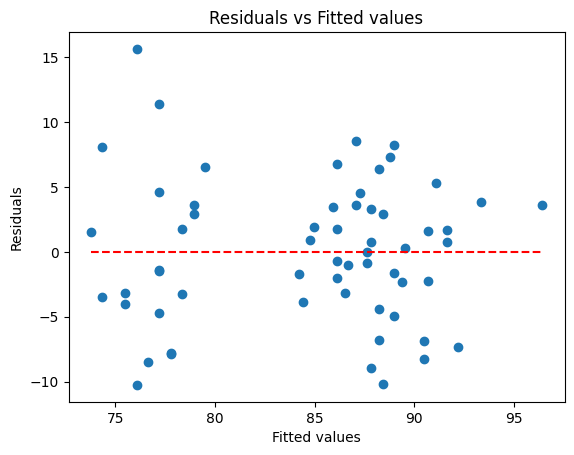

In [28]:
#Reszty dopasowane vs prawdzie wartości 
fitted_values = model.fittedvalues
plt.scatter(fitted_values, residuals)
plt.hlines(0, min(fitted_values), max(fitted_values), colors='r', linestyles='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

In [29]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Test stałości wariancji
bp_test = het_breuschpagan(model.resid, model.model.exog)


bp_test_stat, bp_test_pvalue, _, _ = bp_test


print('Breusch-Pagan test p-value:', bp_test_pvalue)

Breusch-Pagan test p-value: 0.25580447678025486


## Test

In [30]:
from pingouin import ancova

zapis1=ancova(data=dane, dv='score', covar='age', between='exercise')

print(zapis1)

     Source           SS  DF          F     p-unc       np2
0  exercise   980.912057   2  15.144378  0.000006  0.351016
1       age   298.421227   1   9.214697  0.003639  0.141298
2  Residual  1813.579773  56        NaN       NaN       NaN


In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Przeprowadzenie testu post hoc Tukey HSD
posthoc = pairwise_tukeyhsd(dane['score'], dane['exercise'], alpha=0.05)
# Wyświetlenie wyników
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2  meandiff p-adj   lower   upper  reject
------------------------------------------------------
  high      low   11.835    0.0  7.2029 16.4671   True
  high moderate   11.225    0.0  6.5929 15.8571   True
   low moderate    -0.61 0.9462 -5.2421  4.0221  False
------------------------------------------------------
